In [1]:
import numpy as np
import matplotlib.pylab as plt

Let's consider an luminosity profile that declines exponentially with radius with a scale length of h

In [2]:
h=4000 # scale length [pc]
I0=100 # central luminosity density [Lsun/pc^2]
R=np.arange(0,20000,10) # range of R: 0 to 20 kpc in steps of 10 pc
I=I0*np.exp(-R/h) # luminosity profile

Now let's say we want to know the radius at which I=30 Lsun/pc^2. In this case, there *is* an analytic solution so let's work that out.

In [3]:
Iwant = 30 # Lsun/pc^2
Rwant=-h*np.log(Iwant/I0) # note that we are using a natural log (np.log) since we are just solving an exponential.
print('The luminosity density hits a value of {:.2f} Lsun/pc^2 at R = {:.3f} pc'.format(Iwant,Rwant))

The luminosity density hits a value of 30.00 Lsun/pc^2 at R = 4815.891 pc


But what if there *isn't* an analytic solution to the function? Below are two methods to work out the solution computationally. They work best when the function is monotonic.

First lets plot the function to make sure it looks right and is monotonic. 

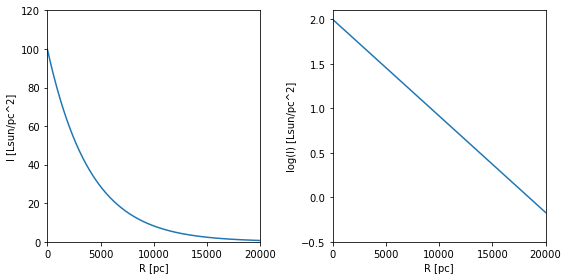

In [4]:
Fig,(LinPlot,LogPlot)=plt.subplots(1,2,figsize=(8,4))
LinPlot.plot(R,I)
LinPlot.set_ylim(0,120)
LinPlot.set_ylabel('I [Lsun/pc^2]')

LogPlot.plot(R,np.log10(I))
LogPlot.set_ylim(-0.5,2.1)
LogPlot.set_ylabel('log(I) [Lsun/pc^2]')

for panel in [LinPlot,LogPlot]:
    panel.set_xlim(0,20000)
    panel.set_xlabel('R [pc]')

Fig.tight_layout()    

OK, so how do we work out computationally where the function hits I = 30 Lsun/pc^2?

First way is to use a root finder. If we have a function f(x) and want to know where does f(x)=c, that's the same as wanting to know when f(x)-c=0. So we can make a new function g(x)=f(x)-c and find the root using scipy optimize.

In [5]:
from scipy import optimize

# define the function. Note that inside the function I have not defined the variables I0, h, or Iwant,
# so it uses the values that are currently in memory. That may or may not be a good idea.....
def gfunc(R):
    I = I0*np.exp(-R/h) 
    g = I - Iwant
    return g

sol = optimize.root(gfunc, 5000) # give it the function name, and a guess as to the root value
Rwant = sol.x[0]

print('The luminosity density hits a value of {:.2f} Lsun/pc^2 at R = {:.3f} pc'.format(Iwant,Rwant))

The luminosity density hits a value of 30.00 Lsun/pc^2 at R = 4815.891 pc


Or, we can use the simple, lazy Mihos method: if you can plot it, you can solve it. Since to make the plot, you had an array of (R,I) values, just find the index where I is closest to the value you want, and ask what R that corresponds to.

In [6]:
idx=np.argmin(np.abs(I-Iwant)) # this gives you the index in the I array where I is closest to Iwant

Rwant=R[idx] # this gives you the R value that corresponds to that index.

print('The luminosity density hits a value of {:.2f} Lsun/pc^2 at R = {:.3f} pc'.format(Iwant,Rwant))

The luminosity density hits a value of 30.00 Lsun/pc^2 at R = 4820.000 pc


Since the R,I values were only calculated in steps of 10 parsecs, your answer is only accurate to that level. 

If you want a more accurate value, you need to have a more finely stepped array of (R,I). Make the array as fine as you want, but the finer it is the more work the computer does.....

In [7]:
# first make a more finely stepped array of R,I values
R=np.arange(0,20000,0.001)
I=I0*np.exp(-R/h)

idx=np.argmin(np.abs(I-Iwant)) # this gives you the index where I is closest to Iwant

Rwant=R[idx] # this gives you the R that corresponds to that index.

print('The luminosity density hits a value of {:.2f} Lsun/pc^2 at R = {:.3f} pc'.format(Iwant,Rwant))

The luminosity density hits a value of 30.00 Lsun/pc^2 at R = 4815.891 pc


Let's plot it to make sure it worked!

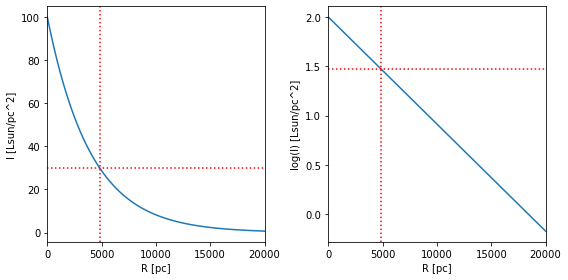

In [8]:
R=np.arange(0,20000,10)
I=I0*np.exp(-R/h)

Fig,(LinPlot,LogPlot)=plt.subplots(1,2,figsize=(8,4))
LinPlot.plot(R,I)
LinPlot.set_ylabel('I [Lsun/pc^2]')
LinPlot.axhline(y=Iwant,ls=':',color='red')

LogPlot.plot(R,np.log10(I))
LogPlot.set_ylabel('log(I) [Lsun/pc^2]')
LogPlot.axhline(y=np.log10(Iwant),ls=':',color='red')

for panel in [LinPlot,LogPlot]:
    panel.set_xlim(0,20000)
    panel.set_xlabel('R [pc]')
    panel.axvline(x=Rwant,ls=':',color='red')

Fig.tight_layout()    

Yay!